<a href="https://colab.research.google.com/github/sabdaaf/learning-ADS/blob/main/week_2_ADS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load dataset
df = pd.read_csv('adult.csv', header=None)
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
 'hours_per_week', 'native_country', 'income']

In [3]:
# Cek data awal
df.info()
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
age               0
workclass         0
fnlwgt            0
education         0
education_num

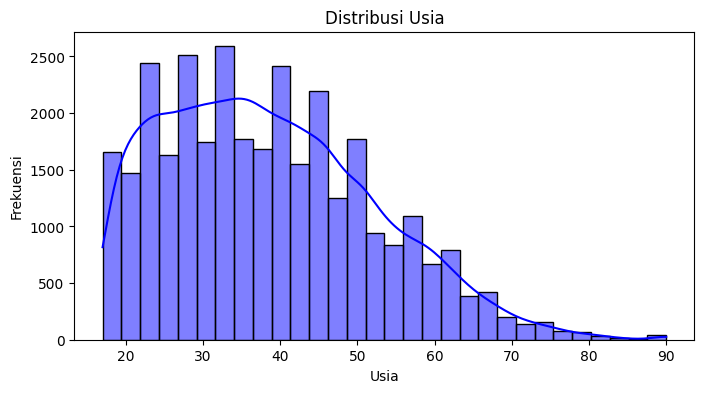

In [6]:
# Visualisasi distribusi usia
import seaborn as sns # Import the seaborn library and alias it as 'sns'
plt.figure(figsize=(8, 4))
sns.histplot(df['age'], bins=30, kde=True, color='blue')
plt.title('Distribusi Usia')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()

<ipython-input-7-d886ccbc2dd3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['income'], y=df['education_num'], palette='coolwarm')


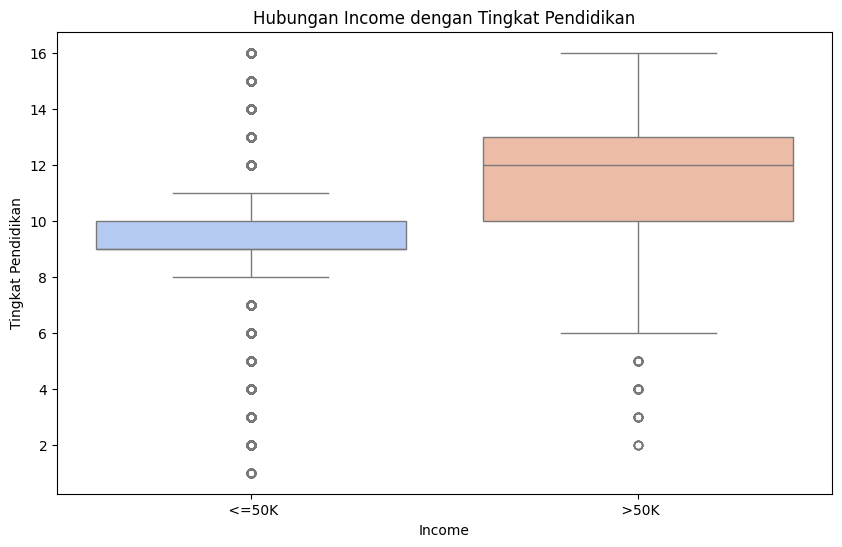

In [7]:
# Visualisasi hubungan income dengan pendidikan
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['income'], y=df['education_num'], palette='coolwarm')
plt.title('Hubungan Income dengan Tingkat Pendidikan')
plt.xlabel('Income')
plt.ylabel('Tingkat Pendidikan')
plt.show()

In [9]:
# Encoding categorical variables
ordinal_features = ['education', 'marital_status']
label_encoders = {}
for feature in ordinal_features:
    label_encoders[feature] = LabelEncoder()
    df[feature] = label_encoders[feature].fit_transform(df[feature])

nominal_features = ["workclass", "occupation", "relationship", "race", "sex", "native_country"]
df = pd.get_dummies(df, columns=nominal_features)

In [10]:
# Encoding target variable
df["income"] = df["income"].str.strip().map({"<=50K": 0, ">50K": 1})

In [11]:
# Cek hasil encoding
print(df.head())
print(df.info())

   age  fnlwgt  education  education_num  marital_status  capital_gain  \
0   39   77516          9             13               4          2174   
1   50   83311          9             13               2             0   
2   38  215646         11              9               0             0   
3   53  234721          1              7               2             0   
4   28  338409          9             13               2             0   

   capital_loss  hours_per_week  income  workclass_ ?  ...  \
0             0              40       0         False  ...   
1             0              13       0         False  ...   
2             0              40       0         False  ...   
3             0              40       0         False  ...   
4             0              40       0         False  ...   

   native_country_ Portugal  native_country_ Puerto-Rico  \
0                     False                        False   
1                     False                        False   
2 

In [12]:
# Split data
X = df.drop(columns=["income"])
y = df["income"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Modeling Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [14]:
# Evaluasi Random Forest
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.862582527253186
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4942
           1       0.76      0.64      0.69      1571

    accuracy                           0.86      6513
   macro avg       0.82      0.79      0.80      6513
weighted avg       0.86      0.86      0.86      6513

Confusion Matrix:
[[4618  324]
 [ 571 1000]]


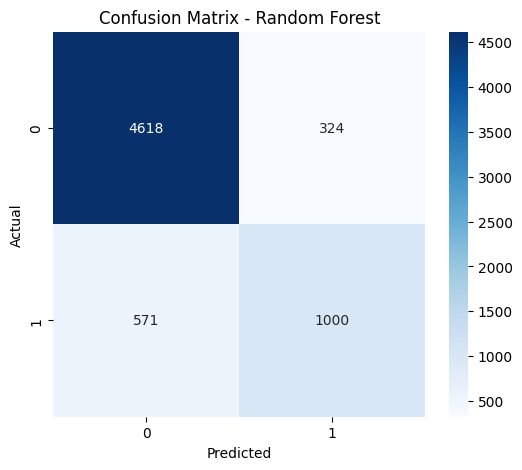

In [15]:
# Visualisasi Confusion Matrix Random Forest
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [16]:
# Modeling Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [17]:
# Evaluasi Decision Tree
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8140641793336404
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4942
           1       0.61      0.65      0.63      1571

    accuracy                           0.81      6513
   macro avg       0.75      0.76      0.75      6513
weighted avg       0.82      0.81      0.82      6513

Confusion Matrix:
[[4281  661]
 [ 550 1021]]


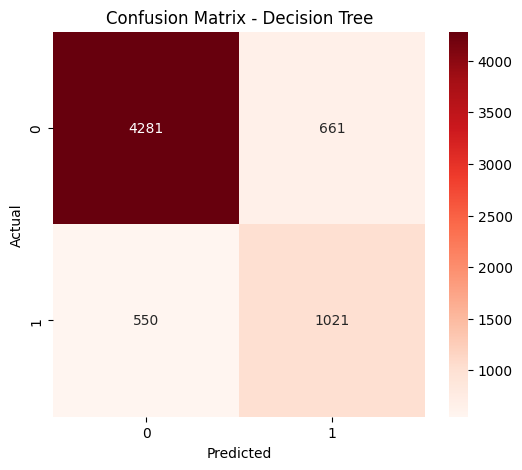

In [18]:
# Visualisasi Confusion Matrix Decision Tree
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Analisis Perbandingan Model

"""
Perbandingan model yang digunakan:
1. **Random Forest**
   - Menggunakan banyak pohon keputusan untuk menghasilkan prediksi yang lebih stabil.
   - Hasil akurasi lebih tinggi dibandingkan Decision Tree karena mengurangi overfitting.
   - Precision dan recall lebih baik untuk kelas minoritas.

2. **Decision Tree**
   - Lebih sederhana tetapi lebih rentan terhadap overfitting.
   - Akurasi lebih rendah dibandingkan Random Forest.
   - Kesalahan klasifikasi lebih banyak terlihat di confusion matrix.

Kesimpulan:
- **Random Forest lebih unggul** dalam akurasi dan generalisasi data.
- Jika ingin meningkatkan performa lebih lanjut, bisa menggunakan hyperparameter tuning atau model lain seperti Logistic Regression atau XGBoost.
"""
